<h1>Chap08 - Handling Images</h1>

Imports

In [106]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 8.1 Loading Images

In [2]:
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)

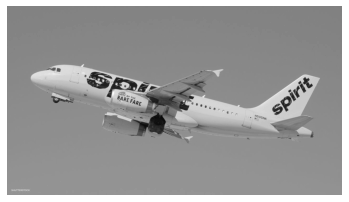

In [3]:
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()

In [4]:
type(image)

numpy.ndarray

In [5]:
image

array([[131, 131, 131, ..., 130, 130, 130],
       [131, 131, 131, ..., 130, 130, 130],
       [131, 131, 131, ..., 130, 130, 130],
       ...,
       [150, 150, 150, ..., 148, 148, 148],
       [150, 150, 150, ..., 148, 148, 148],
       [150, 150, 150, ..., 148, 148, 148]], dtype=uint8)

In [6]:
image.shape #Matrix size and resolution of the image

(450, 800)

In [7]:
#In gray scale, the value of and element means de pixel intensity 0-255
image[0,0]

131

In [8]:
# Read in color scheme
image_bgr = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)
image_bgr[0,0]

array([189, 137,  97], dtype=uint8)

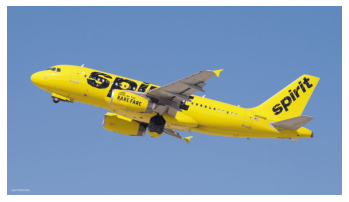

In [9]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

## 8.2 Saving Images

In [10]:
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('C:/Users/mahel/Envs/MachineLearningCookBook/images/plane_new.jpg', image)

True

## 8.3 Resizing Images

In [11]:
image.shape

(450, 800)

In [12]:
image.shape[0]/25

18.0

In [13]:
image.shape[1]/25

32.0

In [14]:
image_22x400 = cv2.resize(image, (32,18))

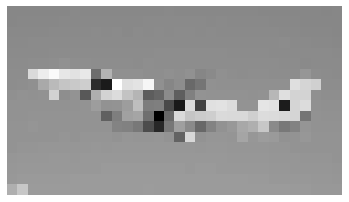

In [15]:
plt.imshow(image_22x400, cmap='gray'), plt.axis('off')
plt.show()

## 8.4 Cropping Images 

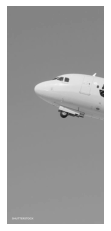

In [16]:
image_cropped = image[:,:200]
plt.imshow(image_cropped, cmap='gray'), plt.axis('off')
plt.show()

## 8.5 Blurring Images 

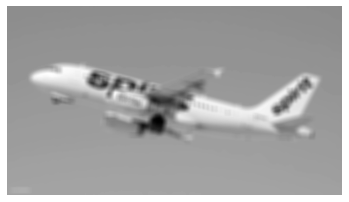

In [17]:
image_blurry = cv2.blur(image, (15,15))
plt.imshow(image_blurry, cmap='gray'), plt.axis('off')
plt.show()

In [18]:
kernel = np.ones((15,15)) / 500

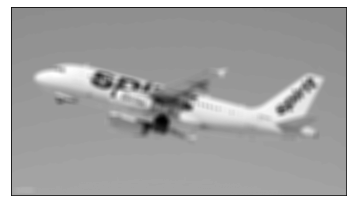

In [19]:
# Applying kernel to blurr
image_kernel = cv2.filter2D(image, -1, kernel)
plt.imshow(image_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

## 8.6 Sharpening Images 

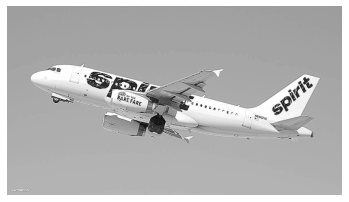

In [20]:
kernel = np.array([[0, -1, 0],
                   [-1, 5.2, -1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap='gray'), plt.axis('off')
plt.show()

## 8.7 Enhacing Contrast 

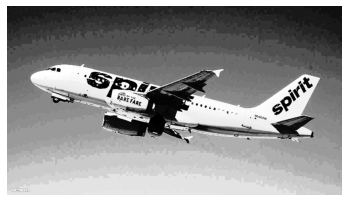

In [21]:
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced, cmap='gray'), plt.axis('off')
plt.show()

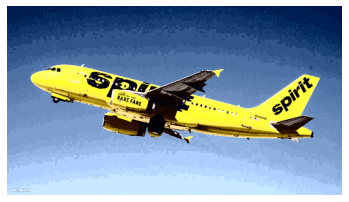

In [22]:
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

## 8.8 Isolating Colors 

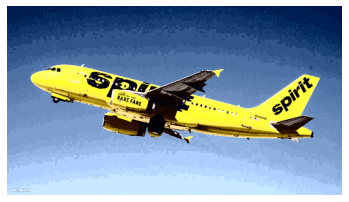

In [23]:
image_bgr = cv2.imread('images/plane.jpg')
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

lower_blue = np.array([10, 10, 10])
upper_blue = np.array([25, 100, 100])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

iamge_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()

## 8.9 Binarizing Images 

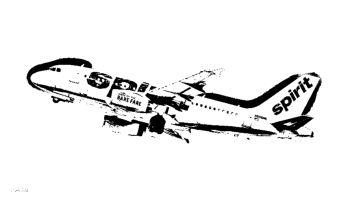

In [24]:
image_grey = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap ='gray'), plt.axis('off')
plt.show()

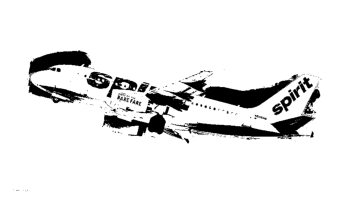

In [25]:
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap ='gray'), plt.axis('off')
plt.show()

## 8.10 Removing Backgrounds 

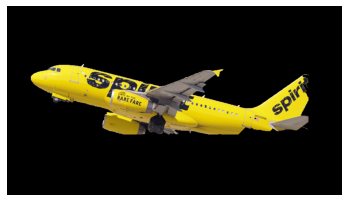

In [26]:
image_bgr = cv2.imread('images/plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0, 56, 720, 250)
mas = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
            mask,
            rectangle,
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask ==2) | (mask ==0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis('off')
plt.show()

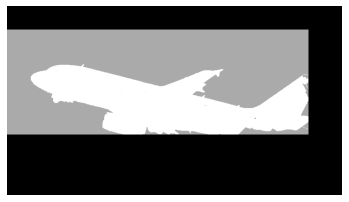

In [27]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

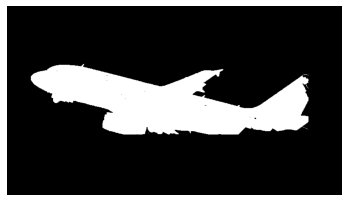

In [28]:
plt.imshow(mask_2, cmap='gray'), plt.axis('off')
plt.show()

## 8.11 Detecting Edges

In [29]:
median_intensity = np.median(image_grey)

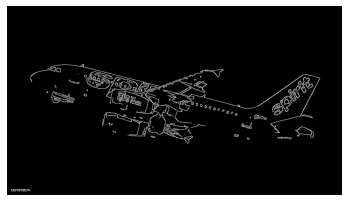

In [31]:
lower_trheshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
image_canny = cv2.Canny(image_grey, lower_trheshold, upper_threshold)
plt.imshow(image_canny, cmap = "gray"), plt.axis("off")
plt.show()

## 8.12 Detecting Corners 

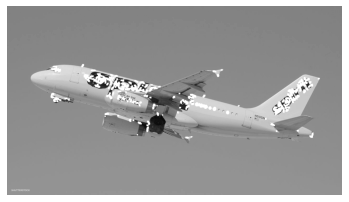

In [76]:
image_bgr = cv2.imread('images/plane.jpg')
image_gray = np.float32(image_grey)
block_size = 3
aperture = 29
free_parameter = 0.04
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)
detector_responses = cv2.dilate(detector_responses, None)
threshold = 0.01
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

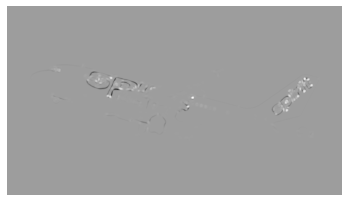

In [77]:
plt.imshow(detector_responses, cmap="gray"), plt.axis("off")
plt.show()

<ipython-input-80-a02bd313a71b>:14: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)


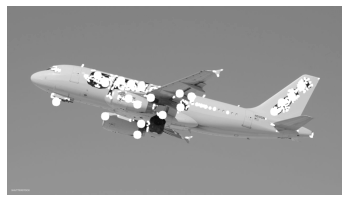

In [80]:
#Shi-Tomasi corner detector
corners_to_detect = 20
minimum_quality_score = 0.05
minimum_distance = 25
corners = cv2.goodFeaturesToTrack(image_gray,
                                 corners_to_detect,
                                 minimum_quality_score,
                                 minimum_distance)

corners = np.float32(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb, cmap='gray'), plt.axis('off')
plt.show()

## 8.13 Creating Features for Machine Learning 

In [89]:
image_45x80 = cv2.resize(image, (45, 80))
image_45x80.flatten()

array([132, 132, 132, ..., 149, 148, 148], dtype=uint8)

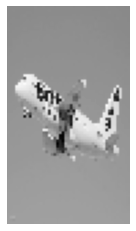

In [90]:
plt.imshow(image_45x80, cmap='gray'), plt.axis('off')
plt.show()

In [91]:
image_45x80.flatten().shape

(3600,)

In [92]:
45 * 80

3600

In [97]:
image_color = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)
image_color_45x80 = cv2.resize(image_color, (45, 80))
image_color_45x80.flatten().shape

(10800,)

## 8.14 Encoding Mean Color as a Feature 

In [100]:
image_bgr = cv2.imread('images/plane.jpg')
channels = cv2.mean(image_bgr)
observation = np.array([(channels[2], channels[1], channels[0])])
observation

array([[124.14074722, 148.46930833, 167.3035    ]])

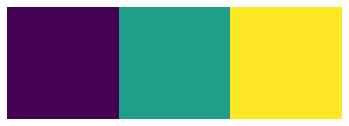

In [101]:
plt.imshow(observation), plt.axis('off')
plt.show()

## 8.15 Encoding Color Histograms as Features 

array([0., 0., 0., 1., 1.], dtype=float32)

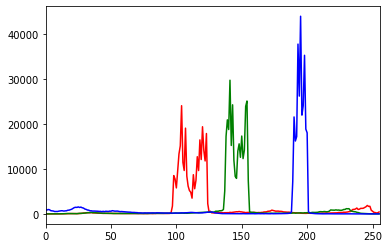

In [109]:
image_bgr = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
features  = []
colors = ('r', 'g', 'b')

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0,256])

    features.extend(histogram)
    plt.plot(histogram, color = channel)
    plt.xlim([0, 256])
    
observation = np.array(features).flatten()
observation[0:5]